## Unsupervised Clusetering using K- Means

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from  sklearn.cluster import KMeans

C:\Users\rashi\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rashi\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("force2020_data_unsupervised_learning.csv",index_col="DEPTH_MD")
#INDEX_COL sets the index column to some column you have suggested

In [3]:
data.head()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342


In [4]:
data.dropna(inplace=True)

In [5]:
data.describe()
#see the counts are appearing same for all the column values that means there are no missing values

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [6]:
data.isnull().sum()

RHOB    0
GR      0
NPHI    0
PEF     0
DTC     0
dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
scaler =StandardScaler()

In [9]:
data.columns

Index(['RHOB', 'GR', 'NPHI', 'PEF', 'DTC'], dtype='object')

 <b>StandardScaler from scikit - learn</b> is used to standardize features by removing the mean and scaling to unit variance. This means that the features will have a mean of 0 and a standard deviation of 1.
 
 <b>Here's how the StandardScaler works:</b>
-  Mean Removal: It subtracts the mean value of each feature from the data. This centers the data around 0.
-  Scaling to Unit Variance: It divides each feature by its standard deviation, so the resulting distribution has a standard deviation of 1.

 ### Formula:-
   X-mean/standardDaviation
 

In [10]:
data[['RHOB_T','GR_T','NPHI_T','PEF_T','DTC_T']]=scaler.fit_transform(data[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])

In [11]:
data.head()

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808


This function is used to find the <b>optimal no. of clusters </b> required in this dataset there are mulitple ways to optimaly find n no. of cluster but here we are using 

Here we are finding the best cluster through comparing there <b>inertia </b>-- <b>Inertia</b>, also known as within-cluster sum of squares (WCSS), is defined as the sum of the squared distances between each point in a cluster and the centroid of that cluster. Mathematically, it can be expressed as:


$$
\text{Inertia} = \sum_{i=1}^N \min_{\mathbf{\mu}_j \in C} \| \mathbf{x}_i - \mathbf{\mu}_j \|^2
$$



<b>The context of inertia refers to within-cluster sum of squares </b>


 <h3 style="color:red">The method we are using is nothing but ELBOW METHOD</h3>

In [12]:
import matplotlib.pyplot as plt
def optimise_kmeans(data,max_k):
    means=[]
    inertia=[]
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(means,inertia,"o-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

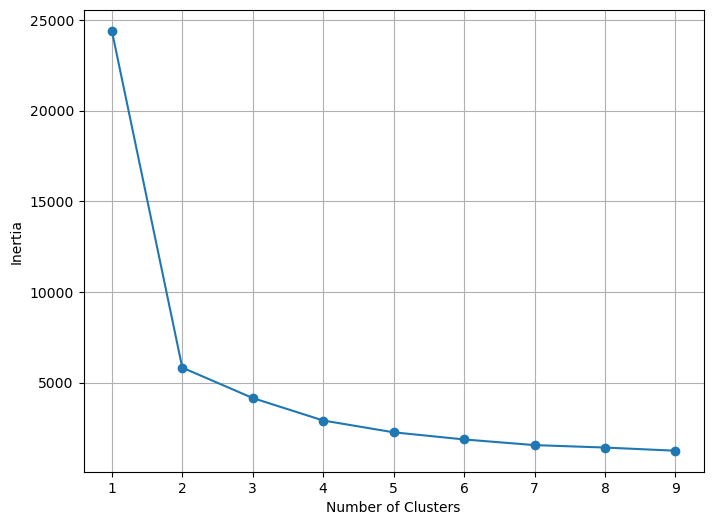

In [13]:
optimise_kmeans(data[["RHOB_T","NPHI_T"]],10)

## Applying Kmean Clustering

In [14]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data[["NPHI_T","RHOB_T"]])

KMeans(n_clusters=3)

In [15]:
data["Clusters"]=kmeans.labels_

In [16]:
data

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,Clusters
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,1
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,1
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,1
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,1
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,1
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0


## Plotting Result using ScatterPlot

<AxesSubplot:xlabel='NPHI_T', ylabel='RHOB_T'>

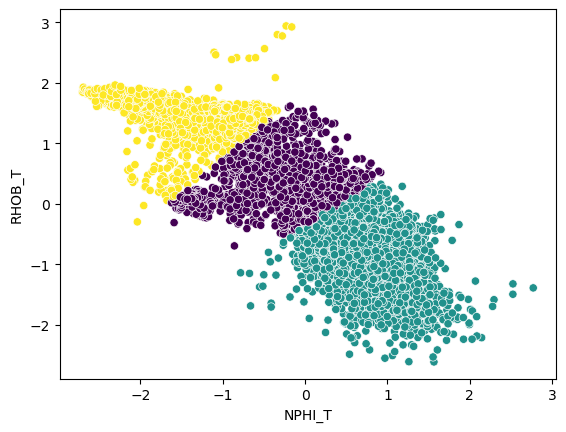

In [17]:
import seaborn as sns
#import matplotlib.pyplot as plt
#plt.scatter(x=data["NPHI_T"],y=data["RHOB_T"],c=data["Clusters"])
sns.scatterplot(x=data["NPHI_T"],y=data["RHOB_T"],c=data["Clusters"])

In [18]:
for x in range(1,6):
    kmeans=KMeans(n_clusters=x)
    kmeans.fit(data[["NPHI_T","RHOB_T"]])
    data[f"cluster_{x}"]=kmeans.labels_

In [19]:
data

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,Clusters,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
DEPTH_MD,,,,,,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,1,0,1,1,1,3
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,1,0,1,1,1,3
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,1,0,1,1,1,3
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,1,0,1,1,1,3
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,1,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0,0,0,0,2,4
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0,0,0,0,2,4
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0,0,0,0,2,4


### set_xlim(left, right):

-  Purpose: Sets the limits for the x-axis.
- Parameters:
- left: The lower bound of the x-axis.
- right: The upper bound of the x-axis.
- Usage: To zoom in or out on a specific region of the x-axis by specifying the range of x-values that should be visible on the plot.
- Example: ax.set_xlim(0, 10) makes sure that only x-values between 0 and 10 are visible.

### set_ylim(bottom, top):

- Purpose: Sets the limits for the y-axis.
- Parameters:
- bottom: The lower bound of the y-axis.
- top: The upper bound of the y-axis.
- Usage: To zoom in or out on a specific region of the y-axis by specifying the range of y-values that should be visible on the plot.

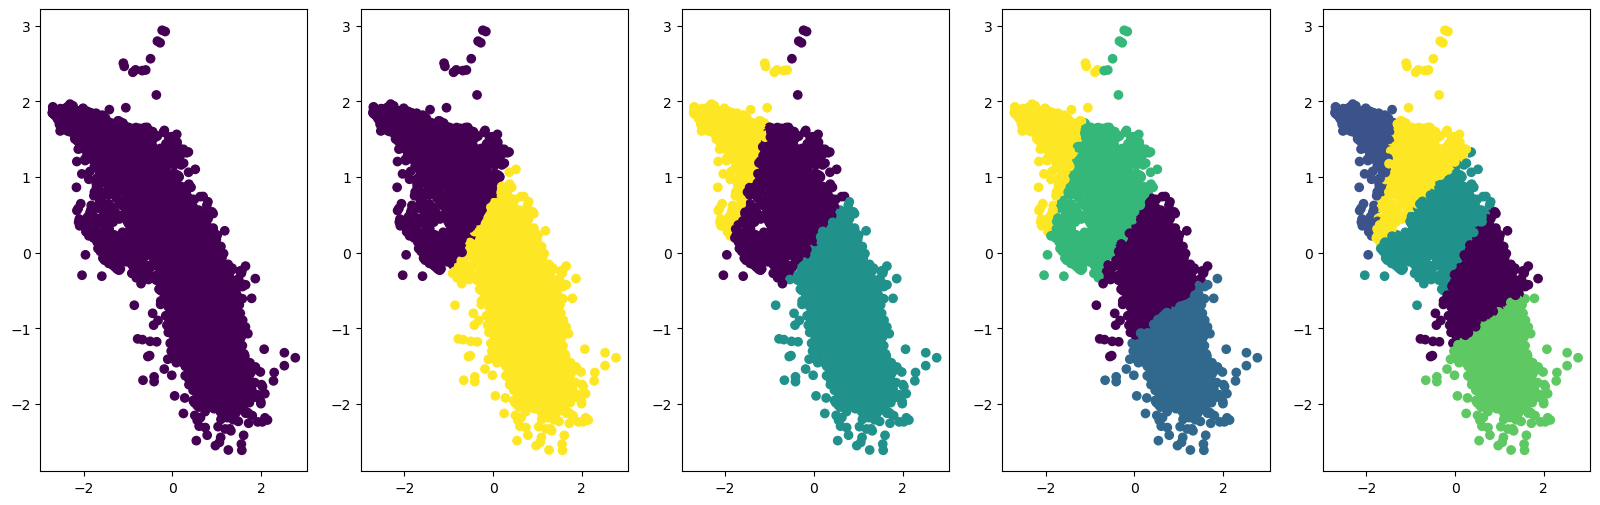

In [20]:
fig,axes= plt.subplots(nrows=1,ncols=5,figsize=(20,6))
for i,x in enumerate(fig.axes,start=1):
    x.scatter(x=data["NPHI_T"],y=data["RHOB_T"],c=data[f"cluster_{i}"])
    #x.set_xlim or set_y lim could aslo be used to limit the range of x and y values
    

<title color="red">There are several clustering algorithms besides K-Means, each with its own strengths and suitable use cases. Here are some popular alternatives:</title color="red">